In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit



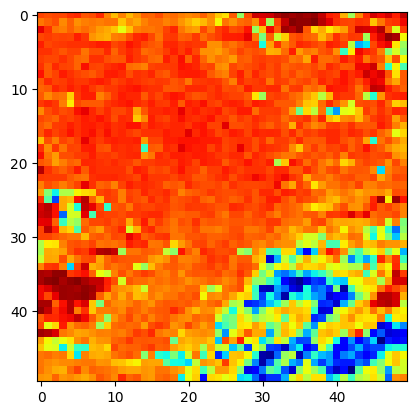

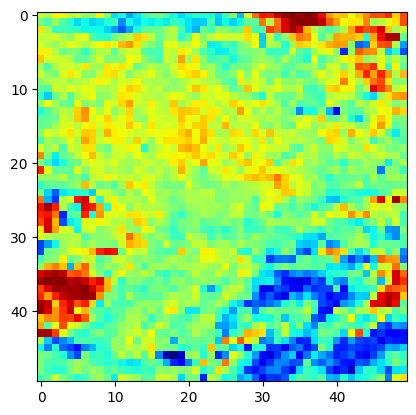

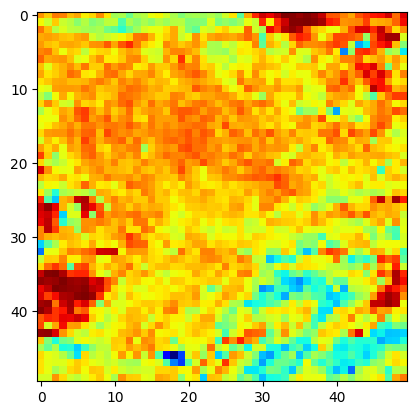

In [3]:
base_path = r"C:\Users\Emem Esther Usoh\Desktop\Machine Learning\Medical\dataset"

folder_dir = os.listdir(base_path)
folder_dir
sel_each_fld = os.path.join(base_path, folder_dir[0])
sel_each_fld
group_img_flds = os.listdir(sel_each_fld)
group_img_flds 
single_image_folder = os.path.join(sel_each_fld, group_img_flds[0])
single_image_folder
images_in_fld = os.listdir(single_image_folder)
img_path = os.path.join(single_image_folder, images_in_fld[0])
img_path

## display an image
import PIL.Image as IMG 
img = np.asarray(IMG.open(img_path))
img.dtype
img.max()
img.shape
plt.imshow(img) 

#the whole image with the 3 channels combinned
## there are 3 channels, let us display the 3 channels
plt.imshow(img[:,:, 0], cmap = "jet")  #first channel
plt.figure()
plt.imshow(img[:,:,1], cmap = "jet") #second channel
plt.figure()
plt.imshow(img[:,:,2], cmap = "jet") #third channel




In [4]:
### write a code that will access all the dataset(images)
## your code will run through all the folders containinf the images
## to do this, all the file path to the images has to be accessible
X = []
Y = []
folder_dir
base_path
for i in range(len(folder_dir)):
    path_1 = os.path.join(base_path, folder_dir[i])
    path_1_dir = os.listdir(path_1)
    # print(path_1_dir)
    for j in range(len(path_1_dir)):
        path_2 = os.path.join(path_1, path_1_dir[j])
        path_2_dir = os.listdir(path_2)
        # print(path_2_dir)
        for k in range(len(path_2_dir)):
            img_path = os.path.join(path_2, path_2_dir[k])
            # print(img_path)
            img = np.asarray(IMG.open(img_path))
            Y.append(int(path_1_dir[j]))
            X.append(img)
        
        
X = np.asarray(X)
Y = np.asarray(Y)

# print(Y.shape)
# print(X.shape)


## Normalize the dataset (0-1)    divide them by 255. we do not normalize Y, just X. X is our target
X = X/255.0
# print(X.max())
# print(X.min())


## split data

x, x_test, y, y_test = train_test_split(X,Y, test_size= 0.2)  ##what is random_state?(this just ensures that the same random values are choosen consistently across all devices)
# print(x.shape)
# print(x_test.shape)
# print(y.shape)
# print(y_test.shape)


## split the x, y into train and validation
x_train, x_val, y_train, y_val= train_test_split(x,y, test_size= 0.1)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)   

## there is no need to reshape because it is the correct formate (50, 50, 3)
## e.g (x_train = x_train[:,:,:, np.newaxis])

(4840, 50, 50, 3)
(538, 50, 50, 3)
(4840,)
(538,)


In [5]:
### biuld architecture

input_to_model = tf.keras.layers.Input(shape = (50,50,3), name = "Input_layer")
x = tf.keras.layers.Conv2D(filters = 32, kernel_size= (3,3), strides = 2, padding= "same", activation= "relu")(input_to_model)
x = tf.keras.layers.Conv2D(filters= 64, kernel_size= (3,3), strides=2, padding= "same", activation="relu")(x)
x = tf.keras.layers.Conv2D(filters= 128, kernel_size= (3,3), strides=2, padding= "same", activation="relu")(x)
x = tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), strides=2, padding= "same", activation="relu")(x)
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64, activation= "relu")(x)
x = tf.keras.layers.Dense(128, activation= "relu")(x)

output = tf.keras.layers.Dense(1, activation= "sigmoid", name = "Output_layer")(x)
## sigmoid since it is binary (0,1), the binary_crossentropy as loss
print(x.shape)
print(output.shape)


model = tf.keras.Model(inputs = input_to_model, outputs = output)
model.summary()                                                                                              




(None, 128)
(None, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 50, 50, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 25, 25, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 64)

In [ ]:
## compile. we select loss, optimizer, metrics
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 1e-4), loss= "binary_crossentropy", metrics= ["accuracy", tf.keras.metrics.Precision(name = "precision") ])

## train the model 
## CALL BACK HERE
model_history = model.fit(x = x_train, y = y_train, validation_data=(x_val, y_val), batch_size= 32, epochs= 20)  ## CALLBACK HERE

Epoch 1/100
152/152 [==============================] - 11s 54ms/step - loss: 0.4225 - accuracy: 0.8283 - precision: 0.1333 - val_loss: 0.3653 - val_accuracy: 0.8309 - val_precision: 0.0000e+00
Epoch 2/100
152/152 [==============================] - 8s 55ms/step - loss: 0.3178 - accuracy: 0.8574 - precision: 0.6506 - val_loss: 0.3037 - val_accuracy: 0.8606 - val_precision: 0.5727
Epoch 3/100
152/152 [==============================] - 9s 57ms/step - loss: 0.2823 - accuracy: 0.8674 - precision: 0.6303 - val_loss: 0.2610 - val_accuracy: 0.8773 - val_precision: 0.6761
Epoch 4/100
152/152 [==============================] - 9s 56ms/step - loss: 0.2733 - accuracy: 0.8665 - precision: 0.6215 - val_loss: 0.2614 - val_accuracy: 0.8773 - val_precision: 0.6923
Epoch 5/100
152/152 [==============================] - 8s 54ms/step - loss: 0.2640 - accuracy: 0.8717 - precision: 0.6399 - val_loss: 0.2469 - val_accuracy: 0.8792 - val_precision: 0.6970
Epoch 6/100
152/152 [==============================] - 

In [ ]:
## model weight

43/43 [==============================] - 0s 9ms/step - loss: 1.3607 - accuracy: 0.8721 - precision: 0.6117
dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])


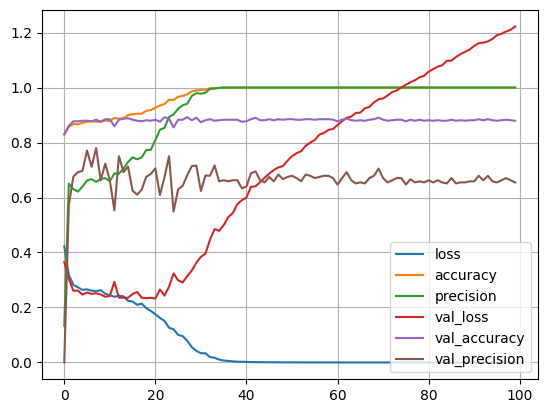

In [ ]:
### evaluation on test set
test_score = model.evaluate(x_test, y_test)

##visualization
keys  = model_history.history.keys()
print(keys) ## these are the parameters measured during training

df = pd.DataFrame(model_history.history)
df.plot()
plt.grid(True)

In [ ]:
## save model, load model
#model.save("yhd.h5")
#model = tf.keras.models.load_model("yhd.h5")

In [12]:
## make prediction

y_pred_probability = model.predict(x_test)
## binary classification (0-1) - just one output. 
## this is a bianry classificatin hence, output of classification is a prob, so we make a decision boundary - example- anything above 0.5 prob, take as one and anything below 0.5, take as 0.
y_pred = np.where(y_pred_probability > 0.5, 1, 0).flatten() ## flatten to look likr the y_test
print(y_pred)
print(y_pred.shape)
print(y_pred.max())
print(y_pred.min())
print(y_test)
print(y_test.shape)

43/43 [==============================] - 0s 9ms/step
[0 0 0 ... 0 0 0]
(1345,)
1
0
[0 0 0 ... 0 0 0]
(1345,)


0.872
0.869
0.872
[[1047   80]
 [  92  126]]


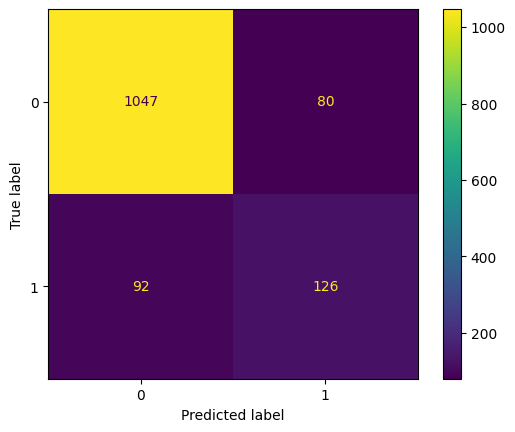

In [13]:
### metrics : precision, recall and accuracy  ## we really need a high precision here because of the sensitivity of the task. predicting or detecting the likelihood of cancer is very important

from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

test_acc = round(accuracy_score(y_test, y_pred),3)
test_pre = round(precision_score(y_test, y_pred, average= "weighted"),3)
test_rec = round(recall_score(y_test, y_pred, average= "weighted"), 3) 


print(test_acc)
print(test_pre)
print(test_rec)

cm = confusion_matrix(y_test, y_pred, labels= [0,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()